In [1]:
import os
os.listdir("Chilli_data/bend/train")

['.DS_Store', 'true', 'false']

In [2]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [3]:
truephoto=[]
falsephoto=[]

In [4]:
for i in os.listdir("Chilli_data/bend/train/true"):
    readimg=io.imread("Chilli_data/bend/train/true/"+i)
    truephoto.append(readimg)

In [5]:
for i in os.listdir("Chilli_data/bend/train/false"):
    readimg=io.imread("Chilli_data/bend/train/false/"+i)
    falsephoto.append(readimg)

In [6]:
for i in os.listdir("Chilli_data/bend/test/true"):
    readimg=io.imread("Chilli_data/bend/test/true/"+i)
    truephoto.append(readimg)

In [7]:
for i in os.listdir("Chilli_data/bend/test/false"):
    readimg=io.imread("Chilli_data/bend/test/false/"+i)
    falsephoto.append(readimg)

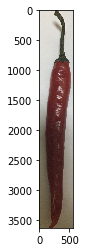

In [8]:
plt.imshow(truephoto[1])
plt.show()

In [9]:
truephoto[3].shape

(3085, 587, 3)

In [36]:
from skimage.measure import label, regionprops

In [135]:
truebi=[]
falsebi=[]
treshold=210 #real red green spot need to have sum of rgb less than 510
for i in truephoto:
    #numpy.ones((i.shape[0],i.shape[1]), dtype=bool)
    R=i[:,:,0]
    G=i[:,:,1]
    B=i[:,:,2]
    meanofrgb=(R+G+B)/1.65
    '''
    for y in i.shape[0]:
        for x in i.shape[1]:
            if()
            '''
    truebi.append(((B<meanofrgb) | (R>B*1.7) | (G>B*1.7))&(R>G*1.5))
    #truebi.append((B>=R) | (B>=G))
for i in falsephoto:
    R=i[:,:,0]
    G=i[:,:,1]
    B=i[:,:,2]
    meanofrgb=(R+G+B)/1.65
    falsebi.append(((B<meanofrgb) | (R>B*1.7) | (G>B*1.7))&(R>G*1.5))
    #falsebi.append((B<meanofrgb) | (R>B*1.7) | (G>B*1.7))

In [80]:
from skimage.morphology import convex_hull_image

In [110]:
regionprops(label(truebi[0]))[1].area

517540

In [136]:
for i in range(len(truebi)):
    '''
    regiogrmax=regionprops(label(truebi[i]))[0]
    #y0,x0=regiogrmax.centroid
    #maxlabel=truebi[i][int(y0),int(x0)]
    maxlabel=regionprops(label(truebi[i]))[0].label
    print(maxlabel)
    '''
    maxlabel=-1
    maxarea=0
    labeled=label(truebi[i])
    regiongr=regionprops(labeled)
    for j in range(len(regiongr)):
        area=regiongr[j].area
        if area<100:
            pass
        if(area>maxarea):
            maxarea=area
            maxlabel=regiongr[j].label
    print("label ",maxlabel," Area",maxarea)
    truebi[i]=(labeled==maxlabel)
    print(np.sum(labeled==maxlabel))
    #plt.imshow(labeled,cmap=plt.cm.gray)
    #plt.show()

label  2  Area 517540
517540
label  1  Area 668947
668947
label  1  Area 1001052
1001052
label  2  Area 586661
586661
label  4  Area 272198
272198
label  2  Area 975879
975879
label  1  Area 421116
421116
label  1  Area 514323
514323
label  1  Area 474356
474356
label  1  Area 388840
388840
label  1  Area 1015709
1015709
label  1  Area 365614
365614
label  1  Area 49177
49177
label  4  Area 794251
794251
label  2  Area 1023422
1023422
label  1  Area 1065655
1065655
label  6  Area 999070
999070
label  3  Area 562403
562403
label  1  Area 351403
351403
label  1  Area 425245
425245
label  3  Area 863588
863588
label  1  Area 373578
373578
label  1  Area 382907
382907
label  1  Area 328373
328373
label  1  Area 365757
365757
label  1  Area 611716
611716
label  1  Area 1032608
1032608
label  1  Area 413010
413010
label  2  Area 848250
848250
label  1  Area 328243
328243
label  2  Area 445047
445047
label  1  Area 464683
464683
label  1  Area 385986
385986
label  1  Area 576409
576409
label 

In [137]:
for i in range(len(falsebi)):
    '''
    regiogrmax=regionprops(label(truebi[i]))[0]
    #y0,x0=regiogrmax.centroid
    #maxlabel=truebi[i][int(y0),int(x0)]
    maxlabel=regionprops(label(truebi[i]))[0].label
    print(maxlabel)
    '''
    maxlabel=-1
    maxarea=0
    labeled=label(falsebi[i])
    regiongr=regionprops(labeled)
    for j in range(len(regiongr)):
        area=regiongr[j].area
        if area<100:
            pass
        if(area>maxarea):
            maxarea=area
            maxlabel=regiongr[j].label
    print("label ",maxlabel," Area",maxarea)
    falsebi[i]=(labeled==maxlabel)
    print(np.sum(labeled==maxlabel))
    #plt.imshow(labeled,cmap=plt.cm.gray)
    #plt.show()

label  2  Area 1114883
1114883
label  1  Area 388751
388751
label  1  Area 653684
653684
label  1  Area 681422
681422
label  2  Area 1419252
1419252
label  1  Area 471424
471424
label  1  Area 577353
577353
label  1  Area 516501
516501
label  1  Area 932908
932908
label  1  Area 854311
854311
label  2  Area 1485466
1485466
label  1  Area 1477182
1477182
label  1  Area 1142710
1142710
label  2  Area 1058999
1058999
label  1  Area 1290026
1290026
label  1  Area 410953
410953
label  1  Area 442514
442514
label  1  Area 496451
496451
label  3  Area 325316
325316
label  1  Area 358115
358115
label  1  Area 325223
325223
label  1  Area 761871
761871
label  1  Area 957076
957076
label  1  Area 356491
356491
label  2  Area 238164
238164
label  1  Area 766516
766516
label  1  Area 312791
312791
label  1  Area 1088030
1088030
label  1  Area 402724
402724
label  7  Area 975415
975415
label  3  Area 311748
311748
label  1  Area 400310
400310
label  7  Area 1184776
1184776
label  4  Area 873125
873

In [96]:
regionprops(label(truebi[2]))[0].label

1

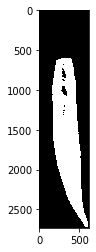

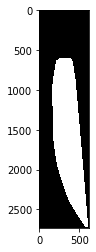

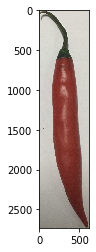

1
_______


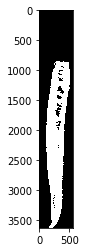

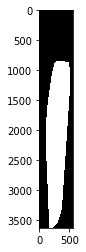

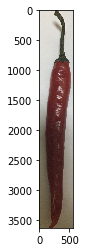

1
_______


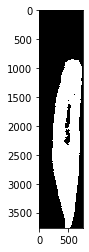

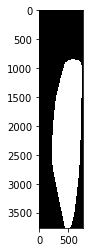

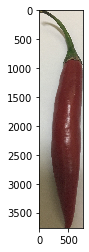

1
_______


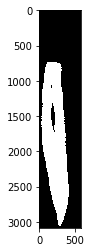

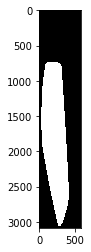

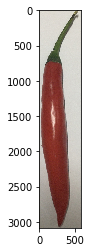

1
_______


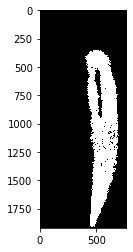

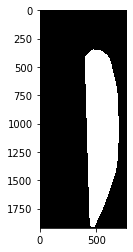

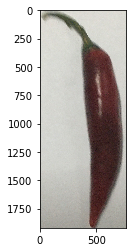

1
_______


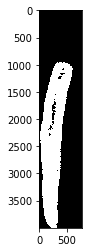

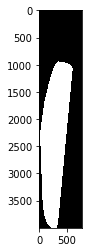

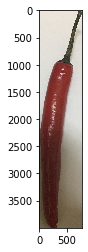

1
_______


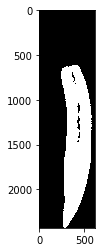

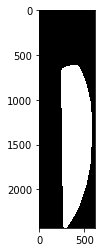

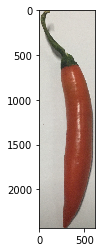

1
_______


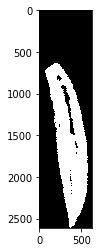

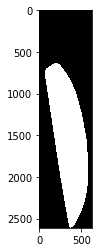

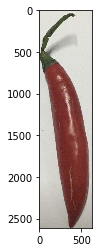

1
_______


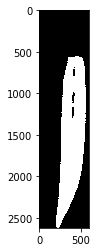

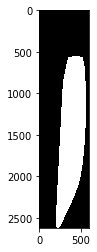

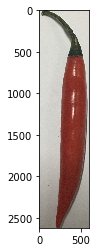

1
_______


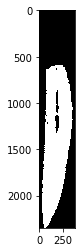

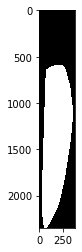

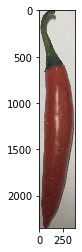

1
_______


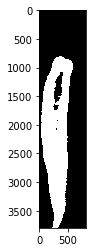

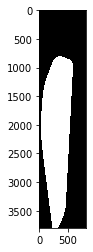

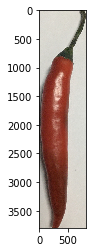

1
_______


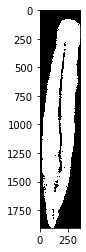

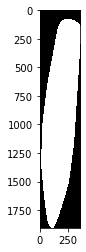

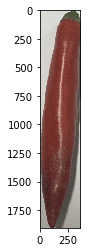

1
_______


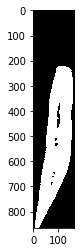

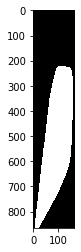

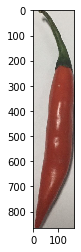

1
_______


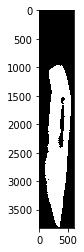

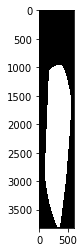

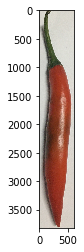

1
_______


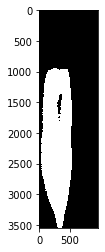

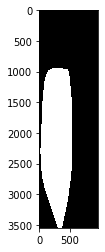

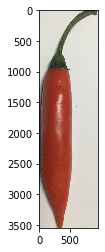

1
_______


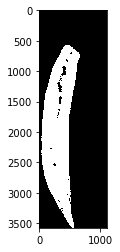

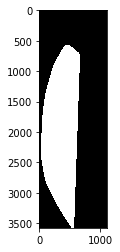

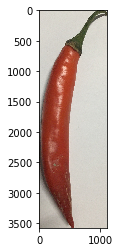

1
_______


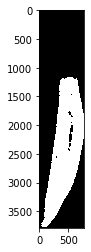

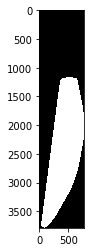

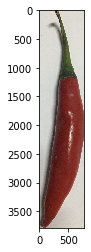

1
_______


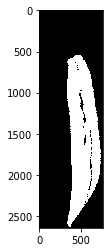

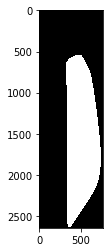

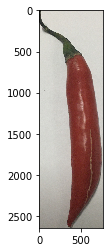

1
_______


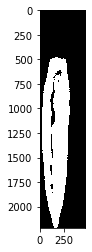

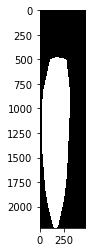

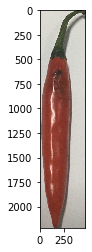

1
_______


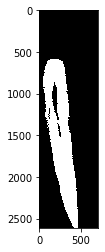

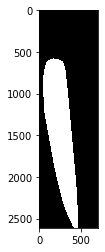

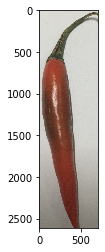

1
_______


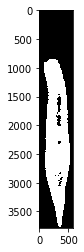

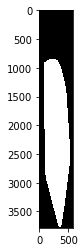

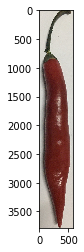

1
_______


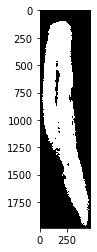

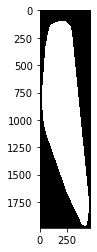

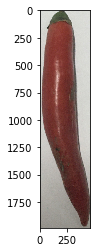

1
_______


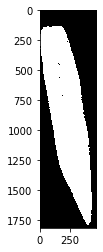

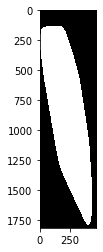

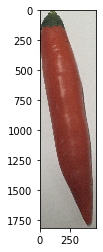

1
_______


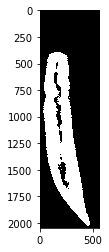

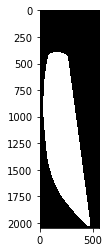

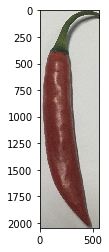

1
_______


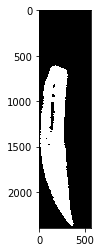

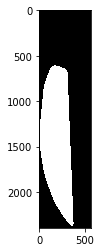

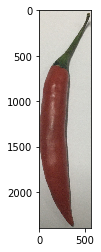

1
_______


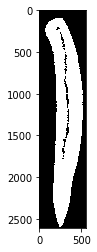

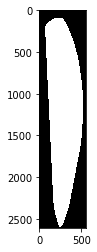

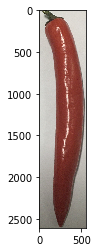

1
_______


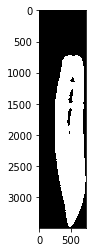

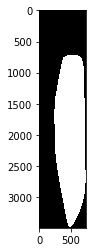

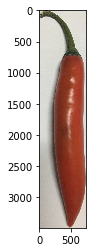

1
_______


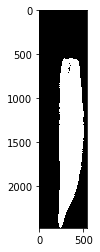

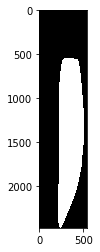

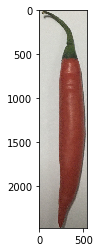

1
_______


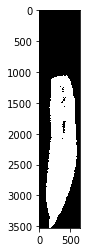

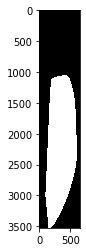

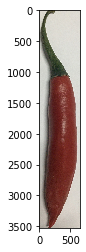

1
_______


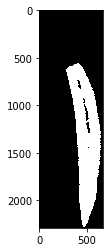

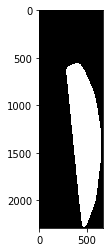

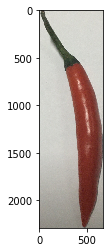

1
_______


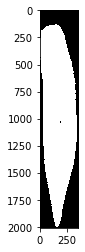

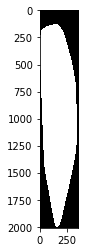

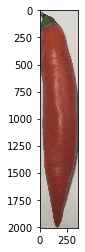

1
_______


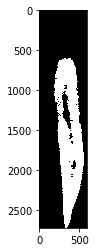

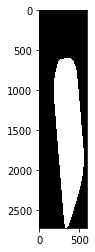

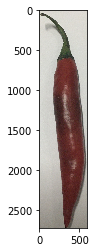

1
_______


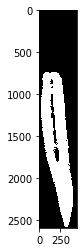

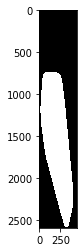

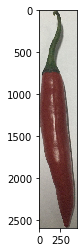

1
_______


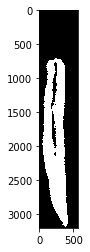

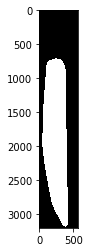

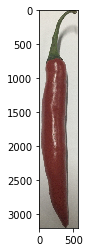

1
_______


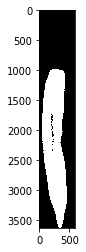

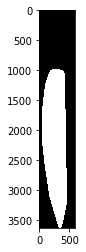

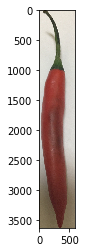

1
_______


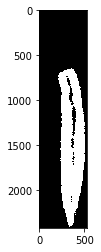

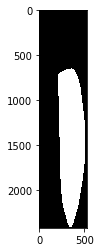

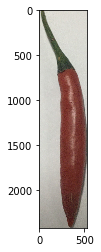

1
_______


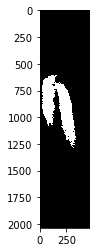

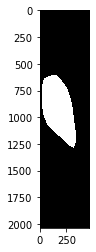

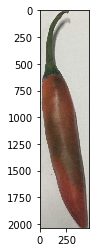

1
_______


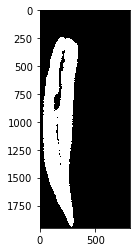

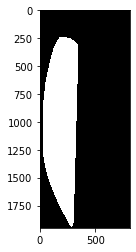

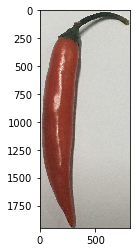

1
_______


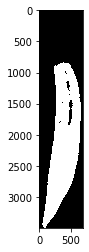

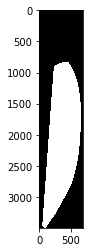

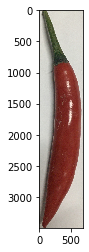

1
_______


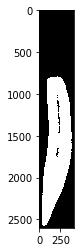

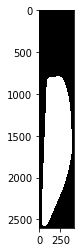

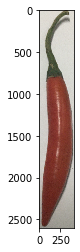

1
_______


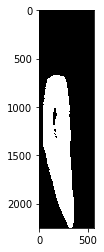

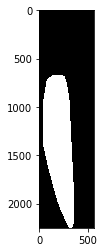

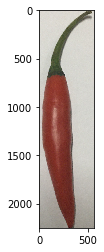

1
_______


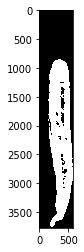

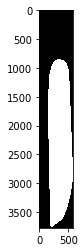

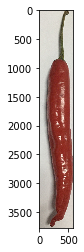

1
_______


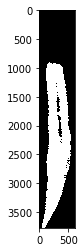

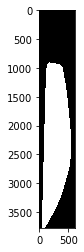

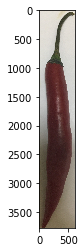

1
_______


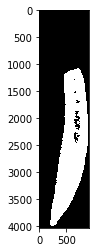

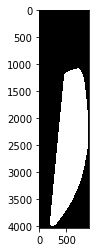

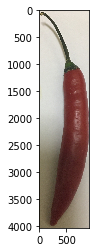

1
_______


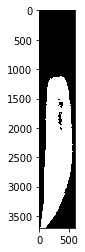

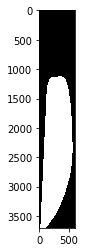

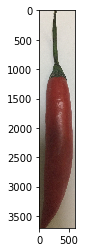

1
_______


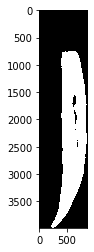

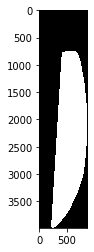

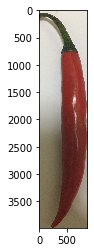

1
_______


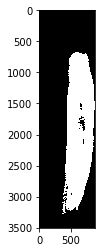

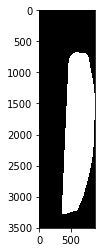

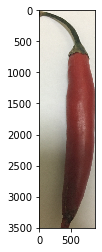

1
_______


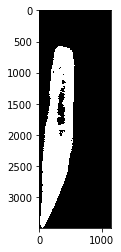

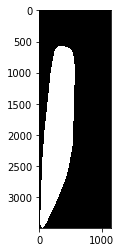

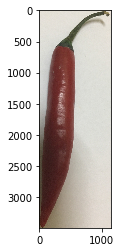

1
_______


In [138]:
for i in range(len(truebi)):
    plt.imshow(truebi[i],cmap=plt.cm.gray)
    plt.show()
    plt.imshow(convex_hull_image(truebi[i]),cmap=plt.cm.gray)
    plt.show()
    plt.imshow(truephoto[i])
    plt.show()
    print(label((truebi[i])).max())
    print("_______")

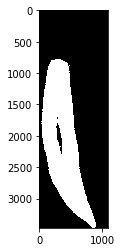

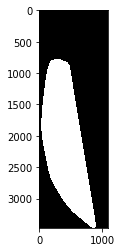

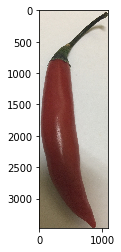

1
_______


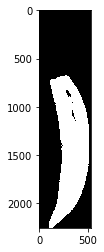

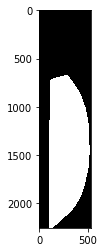

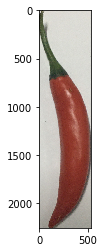

1
_______


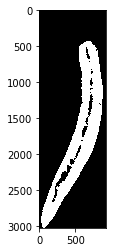

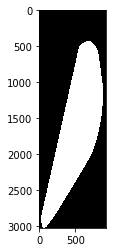

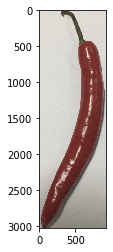

1
_______


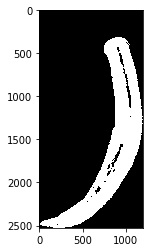

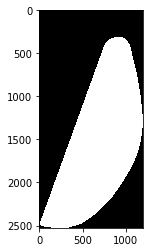

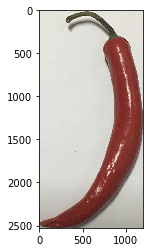

1
_______


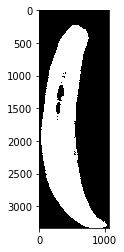

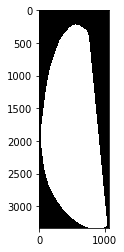

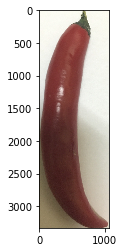

1
_______


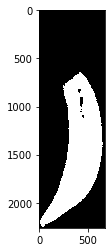

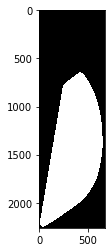

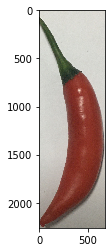

1
_______


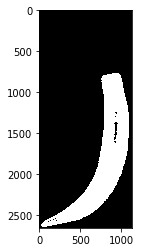

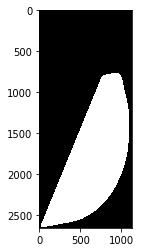

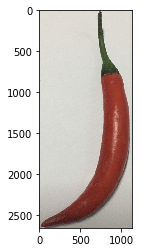

1
_______


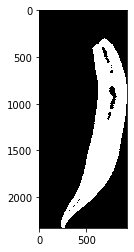

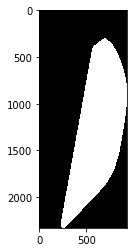

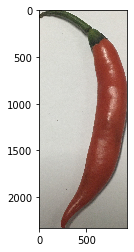

1
_______


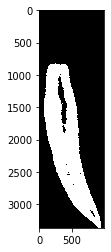

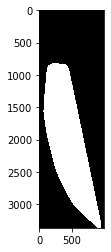

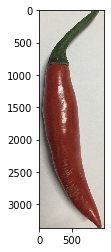

1
_______


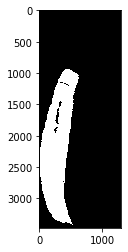

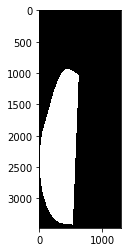

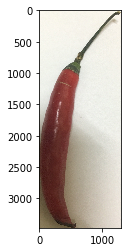

1
_______


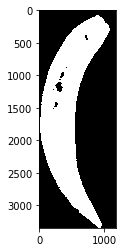

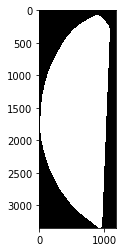

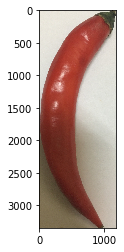

1
_______


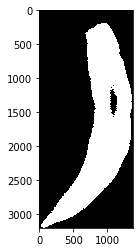

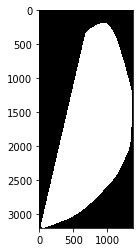

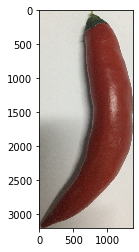

1
_______


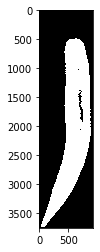

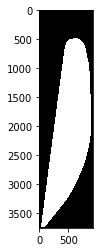

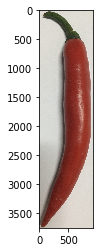

1
_______


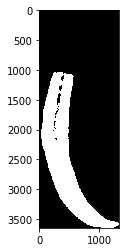

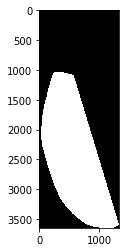

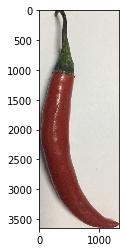

1
_______


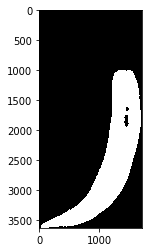

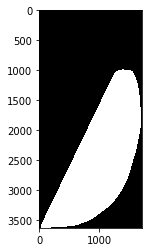

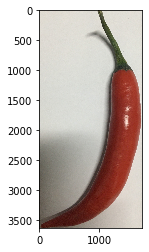

1
_______


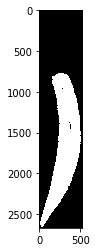

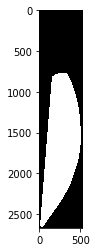

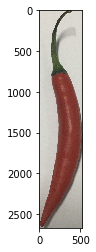

1
_______


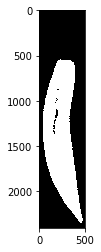

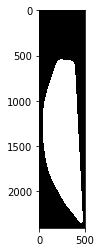

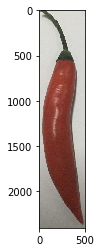

1
_______


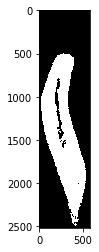

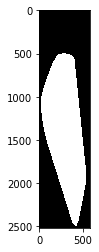

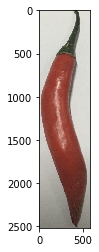

1
_______


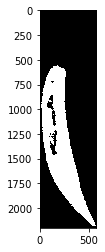

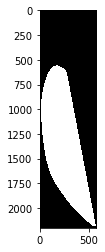

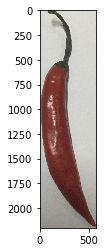

1
_______


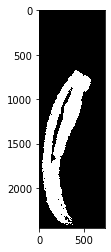

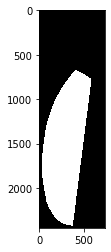

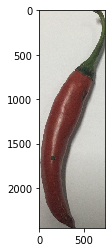

1
_______


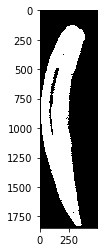

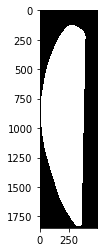

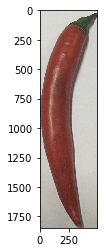

1
_______


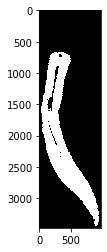

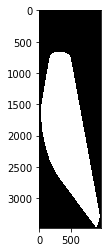

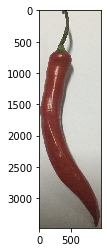

1
_______


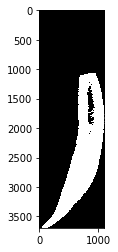

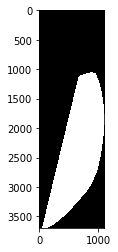

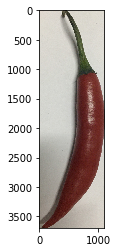

1
_______


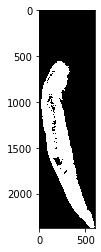

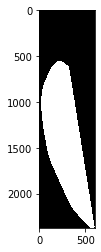

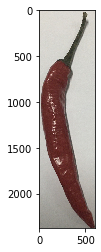

1
_______


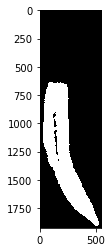

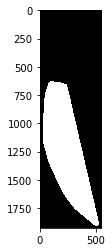

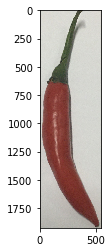

1
_______


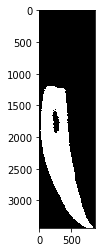

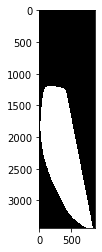

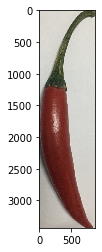

1
_______


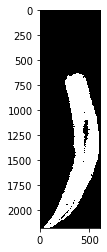

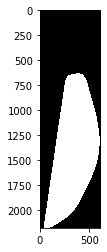

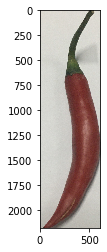

1
_______


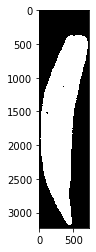

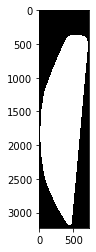

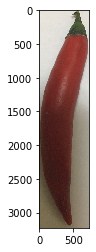

1
_______


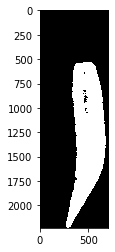

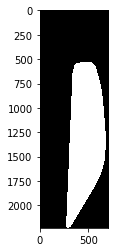

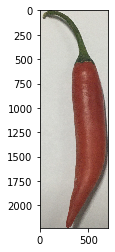

1
_______


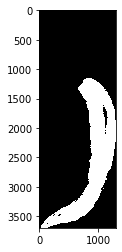

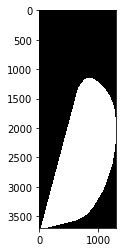

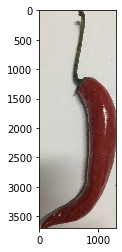

1
_______


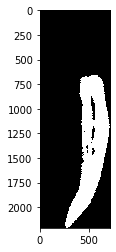

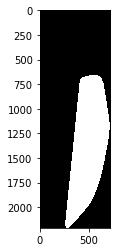

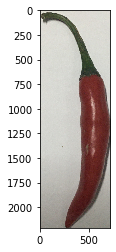

1
_______


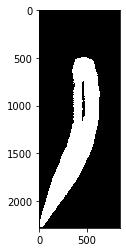

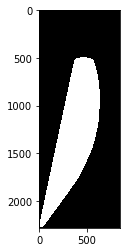

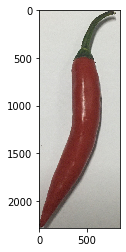

1
_______


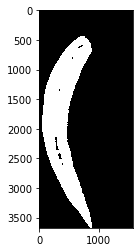

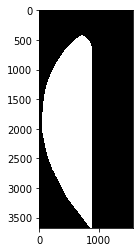

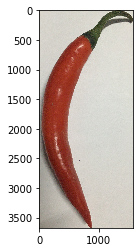

1
_______


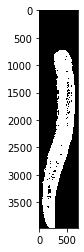

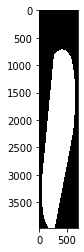

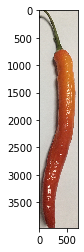

1
_______


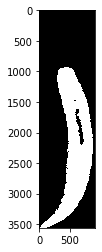

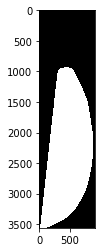

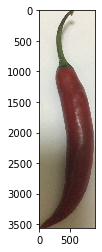

1
_______


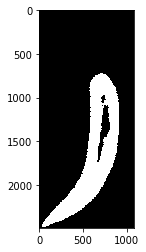

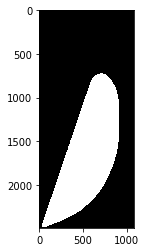

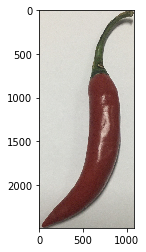

1
_______


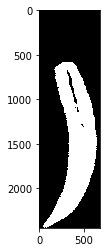

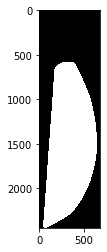

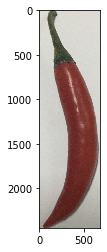

1
_______


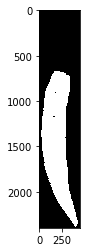

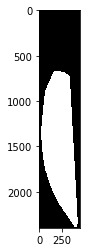

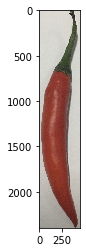

1
_______


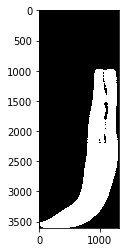

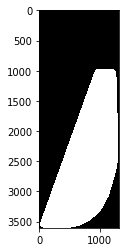

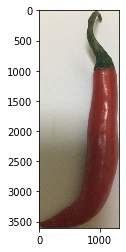

1
_______


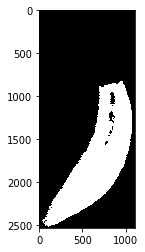

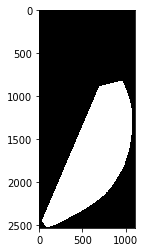

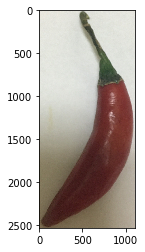

1
_______


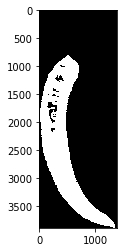

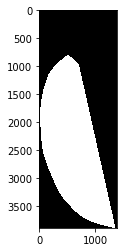

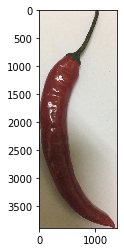

1
_______


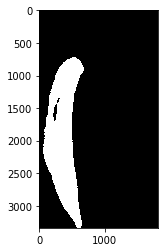

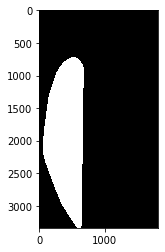

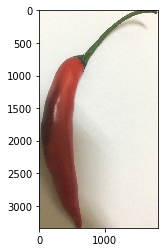

1
_______


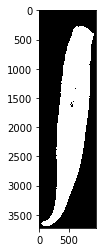

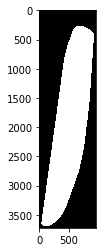

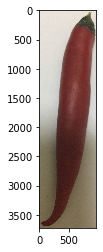

1
_______


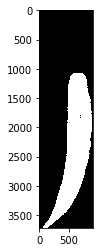

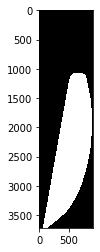

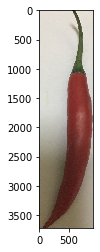

1
_______


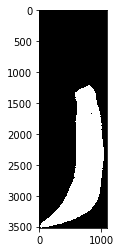

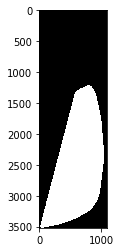

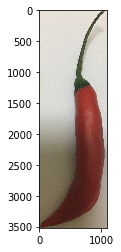

1
_______


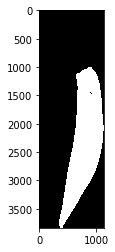

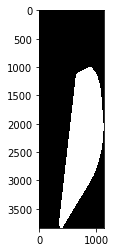

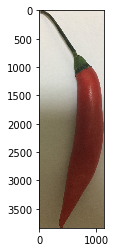

1
_______


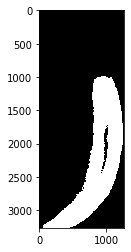

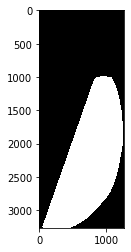

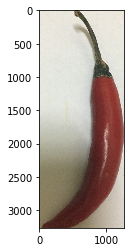

1
_______


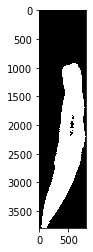

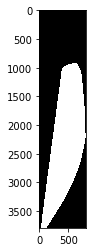

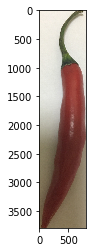

1
_______


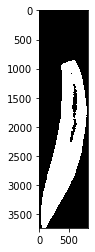

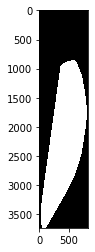

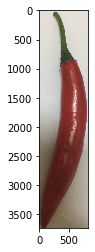

1
_______


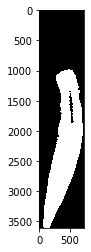

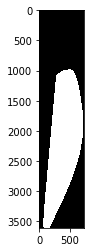

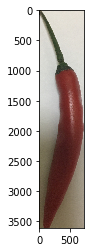

1
_______


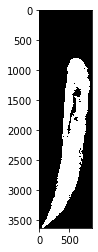

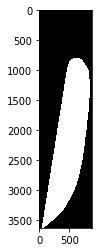

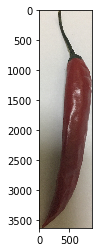

1
_______


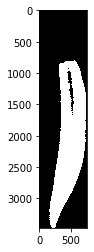

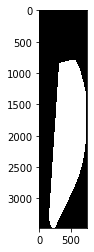

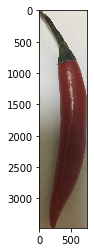

1
_______


In [139]:
for i in range(len(falsebi)):
    plt.imshow(falsebi[i],cmap=plt.cm.gray)
    plt.show()
    plt.imshow(convex_hull_image(falsebi[i]),cmap=plt.cm.gray)
    plt.show()
    plt.imshow(falsephoto[i])
    plt.show()
    print(label((falsebi[i])).max())
    print("_______")

In [150]:
trueval=[]
falseval=[]
for i in range(len(truebi)):
    trueval.append(np.sum(truebi[i])*100/np.sum(convex_hull_image(truebi[i])))
for i in range(len(falsebi)):
    falseval.append(np.sum(falsebi[i])*100/np.sum(convex_hull_image(falsebi[i])))

In [151]:
trueval=np.array(trueval)

In [152]:
falseval=np.array(falseval)

In [153]:
import pandas as pd

In [154]:
print(len(trueval),len(falseval))

48 52


In [155]:
d = dict( F = falseval, T = trueval )

In [156]:
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

In [157]:
df.to_csv("blend_convexhull.csv")

In [158]:
d={}
thress=[]
percentcorr=[]

for ia in range(0,1000,1):
    i=ia/10
    thress.append(i)
    percentcorr.append((np.sum(falseval<i)+np.sum(trueval>i))/(len(trueval)+len(falseval)))
d = dict( thres = thress, percor = np.array(percentcorr)*100 )
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

In [159]:
df.to_csv("boothforse.csv")